# Topic modelling of Lenovo mobile reviews (LDA)

In [1]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
import pandas as pd

In [3]:
review_data = pd.read_csv('data/K8 Reviews v0.2.csv').drop('sentiment',axis=1)
review_data.head()

,review
0,Good but need updates and improvements
1,"Worst mobile i have bought ever, Battery is dr..."
2,when I will get my 10% cash back.... its alrea...
3,Good
4,The worst phone everThey have changed the last...


In [4]:
review_data.shape

# We have 14K reviews 

(14675, 1)

# Data Pre-Processing
### 1. Replacing/Dropping NULL values

In [5]:
review_data.isnull().sum()

# Since our data has no null values will be skip this step

review    0
dtype: int64

### 2. Converting to LOWER case

In [6]:
review_data['clean_review'] = review_data['review'].apply(lambda x: str(x).lower())
review_data.head()

,review,clean_review
0,Good but need updates and improvements,good but need updates and improvements
1,"Worst mobile i have bought ever, Battery is dr...","worst mobile i have bought ever, battery is dr..."
2,when I will get my 10% cash back.... its alrea...,when i will get my 10% cash back.... its alrea...
3,Good,good
4,The worst phone everThey have changed the last...,the worst phone everthey have changed the last...


### 3. REMOVE NON-ALPHA DATA(DIGITS,PUNCTUATIONS,DIACRITICS)

In [7]:
review_data['clean_review'] = review_data['clean_review'].str.replace(r'[^a-zA-Z\s]', ' ',regex=True) 
review_data.head()

,review,clean_review
0,Good but need updates and improvements,good but need updates and improvements
1,"Worst mobile i have bought ever, Battery is dr...",worst mobile i have bought ever battery is dr...
2,when I will get my 10% cash back.... its alrea...,when i will get my cash back its alrea...
3,Good,good
4,The worst phone everThey have changed the last...,the worst phone everthey have changed the last...


### 4. REMOVING WHITE SPACE

In [8]:
review_data['clean_review'] = review_data['clean_review'].str.replace(r'\s{2,}', ' ',regex=True)
review_data.head()

,review,clean_review
0,Good but need updates and improvements,good but need updates and improvements
1,"Worst mobile i have bought ever, Battery is dr...",worst mobile i have bought ever battery is dra...
2,when I will get my 10% cash back.... its alrea...,when i will get my cash back its already january
3,Good,good
4,The worst phone everThey have changed the last...,the worst phone everthey have changed the last...


### 5. WORD TOKENIZATION

In [9]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/jigishap/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
review_data['clean_review'] = review_data['clean_review'].apply(lambda x: word_tokenize(x))
review_data.head()

,review,clean_review
0,Good but need updates and improvements,"[good, but, need, updates, and, improvements]"
1,"Worst mobile i have bought ever, Battery is dr...","[worst, mobile, i, have, bought, ever, battery..."
2,when I will get my 10% cash back.... its alrea...,"[when, i, will, get, my, cash, back, its, alre..."
3,Good,[good]
4,The worst phone everThey have changed the last...,"[the, worst, phone, everthey, have, changed, t..."


### 6. REMOVE UNNECESSARY WORDS

In [11]:
!pip install stopwords


[notice] A new release of pip available: 22.2.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [12]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jigishap/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
review_data['clean_review'] = review_data['clean_review'].apply\
(lambda x:[word for word in x if word not in stopwords.words("english") and len(word) > 3 and word.isalpha()])
review_data.head()


,review,clean_review
0,Good but need updates and improvements,"[good, need, updates, improvements]"
1,"Worst mobile i have bought ever, Battery is dr...","[worst, mobile, bought, ever, battery, drainin..."
2,when I will get my 10% cash back.... its alrea...,"[cash, back, already, january]"
3,Good,[good]
4,The worst phone everThey have changed the last...,"[worst, phone, everthey, changed, last, phone,..."


In [14]:
review_data = review_data[review_data['clean_review'].map(lambda x: len(x)) > 1].reset_index(drop=True)
# Keeping records with more than single words

### 7. LEMMATIZATION

In [15]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jigishap/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
review_data['clean_review'] = review_data['clean_review'].apply\
(lambda x: [WordNetLemmatizer().lemmatize(word) for word in x])
review_data.head()

,review,clean_review
0,Good but need updates and improvements,"[good, need, update, improvement]"
1,"Worst mobile i have bought ever, Battery is dr...","[worst, mobile, bought, ever, battery, drainin..."
2,when I will get my 10% cash back.... its alrea...,"[cash, back, already, january]"
3,The worst phone everThey have changed the last...,"[worst, phone, everthey, changed, last, phone,..."
4,Only I'm telling don't buyI'm totally disappoi...,"[telling, buyi, totally, disappointedpoor, bat..."


### 8. Extracting only NOUN

In [17]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jigishap/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [18]:
review_data['clean_review'] = review_data['clean_review'].apply\
(lambda x: [word for word in x if nltk.pos_tag([word])[0][1] == 'NN'])

In [19]:
review_data = review_data[review_data['clean_review'].map(lambda x: len(x)) > 1].reset_index(drop=True)
# Keeping records with more than single words

In [20]:
review_data.head()

,review,clean_review
0,Good but need updates and improvements,"[need, update, improvement]"
1,"Worst mobile i have bought ever, Battery is dr...","[mobile, bought, battery, hell, backup, hour, ..."
2,when I will get my 10% cash back.... its alrea...,"[cash, january]"
3,The worst phone everThey have changed the last...,"[phone, everthey, phone, problem, amazon, phon..."
4,Only I'm telling don't buyI'm totally disappoi...,"[buyi, disappointedpoor, batterypoor, camerawa..."


### 9. Document Term Matrix

In [21]:
import gensim
from gensim import corpora

In [22]:
dictionary = corpora.Dictionary(review_data['clean_review'])
print(dictionary)

# We have 6724 unique tokens

Dictionary<6724 unique tokens: ['improvement', 'need', 'update', 'amazon', 'backup']...>


In [23]:
doc_term_matrix = review_data['clean_review'].apply(lambda x: dictionary.doc2bow(x))
doc_term_matrix[:10]

# Each tokenized words has been assigned index value and thier count in corpus

0                             [(0, 1), (1, 1), (2, 1)]
1    [(3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1...
2                                   [(19, 1), (20, 1)]
3                  [(3, 2), (21, 1), (22, 3), (23, 1)]
4        [(24, 1), (25, 1), (26, 1), (27, 1), (28, 1)]
5    [(14, 1), (22, 1), (29, 1), (30, 1), (31, 1), ...
6                           [(5, 1), (36, 1), (37, 1)]
7    [(14, 2), (22, 2), (23, 2), (34, 1), (38, 1), ...
8                 [(44, 1), (45, 1), (46, 1), (47, 1)]
9                  [(8, 1), (22, 1), (48, 1), (49, 1)]
Name: clean_review, dtype: object

### LDA

In [24]:
from IPython.display import clear_output

In [25]:
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(corpus=doc_term_matrix, num_topics=12, id2word=dictionary, passes=10,random_state=45)
clear_output()

# corpus requires document term matrix
# num_topics is used to define number of topics to create from corpus
# id2word requires mapping of words
# passes is used to define number of iterations

In [26]:
ldamodel.print_topics()

# We have printed all 12 topics and their keywords generated by LDA

[(0,
  '0.208*"camera" + 0.104*"quality" + 0.041*"phone" + 0.033*"sound" + 0.028*"front" + 0.023*"battery" + 0.022*"mode" + 0.020*"depth" + 0.019*"display" + 0.018*"rear"'),
 (1,
  '0.117*"feature" + 0.065*"phone" + 0.057*"android" + 0.032*"stock" + 0.032*"card" + 0.028*"memory" + 0.028*"contact" + 0.023*"user" + 0.022*"slot" + 0.016*"option"'),
 (2,
  '0.341*"mobile" + 0.184*"problem" + 0.094*"heating" + 0.023*"heat" + 0.017*"network" + 0.014*"battery" + 0.011*"hang" + 0.009*"month" + 0.007*"connection" + 0.006*"player"'),
 (3,
  '0.061*"screen" + 0.061*"charger" + 0.058*"phone" + 0.050*"turbo" + 0.029*"glass" + 0.020*"processor" + 0.018*"gorilla" + 0.017*"core" + 0.016*"month" + 0.016*"time"'),
 (4,
  '0.156*"update" + 0.079*"software" + 0.042*"system" + 0.036*"phone" + 0.034*"oreo" + 0.024*"need" + 0.016*"problem" + 0.016*"bill" + 0.015*"hardware" + 0.015*"lenovo"'),
 (5,
  '0.192*"phone" + 0.102*"battery" + 0.062*"price" + 0.058*"performance" + 0.057*"camera" + 0.052*"awesome" + 0.

### Visualizing LDA model topics

In [27]:
import pyLDAvis # To visualize lda model
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel,doc_term_matrix,dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.294289 -0.072868       1        1  13.538189
10     0.099539  0.016420       2        1  11.844206
5     -0.223733 -0.073671       3        1  11.536076
6     -0.131177  0.209149       4        1  11.347363
8     -0.016731  0.115262       5        1   9.630084
9      0.040273 -0.089971       6        1   8.831860
3     -0.029266  0.034212       7        1   8.121392
2      0.113813  0.275252       8        1   6.914830
1      0.026999 -0.115415       9        1   5.628353
7      0.111334 -0.216809      10        1   4.973359
4      0.172706  0.023733      11        1   4.161052
11     0.130531 -0.105295      12        1   3.473235, topic_info=        Term         Freq        Total Category  logprob  loglift
15    mobile  2339.000000  2339.000000  Default  30.0000  30.0000
68   product  1935.000000  1935.000000  Default  29.0000  29.0000
77    camera  3447.000000  3447.000000  Default  28.0000  28.0000
5    battery  3290.000000  3290.000000  Default  27.0000  27.0000
14    lenovo  2156.000000  2156.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
22     phone    76.776441  6854.364297  Topic12  -3.8025  -1.1317
89      fast    34.077981   819.466855  Topic12  -4.6147   0.1801
60      time    27.277201  1032.327370  Topic12  -4.8373  -0.2734
553  upgrade    10.977201    26.523306  Topic12  -5.7475   2.4779
16    please    14.885455   419.818563  Topic12  -5.4430   0.0206

[678 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
3159      3  0.961037       abhi
806       2  0.976079     accept
391       9  0.963543  accessory
3248      8  0.897744   activity
1656      9  0.970999    adapter
...     ...       ...        ...
43        6  0.804586       year
43        7  0.182860       year
1151      2  0.986790  yesterday
440       5  0.935641       zero
431       1  0.971582       zoom

[1045 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 11, 6, 7, 9, 10, 4, 3, 2, 8, 5, 12])

Since, some topics in above graph are overlapping each other we will try to find optimal number of topics.

In [28]:
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=ldamodel,texts=review_data['clean_review'],\
                                     dictionary=dictionary , coherence='c_v')
print('\nCoherence Score: ', coherence_model_lda.get_coherence())

# Compute Coherence Score


Coherence Score:  0.5563624387311809


In [29]:
# Computing coherence score for different size of topic

def calculate_topic_cv(ldamodel,texts,dictionary,topic_range):
  cv_score =[]
  topic_num = []
  for i in range(2,topic_range):
    topic_num.append(i)
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(doc_term_matrix, num_topics=i, id2word=dictionary, passes=10,random_state=45)
    cv_score.append(CoherenceModel(model=ldamodel,texts=texts,\
                                   dictionary=dictionary , coherence='c_v').get_coherence())
    clear_output()
  return topic_num,cv_score

In [30]:
topic_num,cv_score = calculate_topic_cv(ldamodel,review_data['clean_review'],dictionary,15)

In [31]:
pd.DataFrame(zip(topic_num,cv_score),columns=['Topic','Coherence_Score']).set_index\
('Topic').sort_values('Coherence_Score',ascending=False)

,Coherence_Score
Topic,
8,0.614495
9,0.611938
2,0.611865
3,0.611460
7,0.606568
4,0.606537
6,0.598415
11,0.582003
10,0.579540


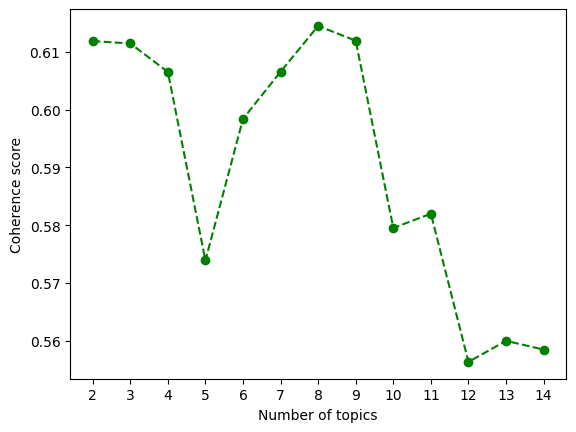

In [32]:
import matplotlib.pyplot as plt

plt.plot(topic_num,cv_score,color='green', marker='o', linestyle='dashed')
plt.xticks(range(2,15))
plt.xlabel('Number of topics')
plt.ylabel('Coherence score')
plt.show()

### we will be going with number of topic 6 as with 8 topics there will be many overlaps .

In [33]:
# Creating LDA model with number of topics as 6

Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(doc_term_matrix, num_topics=6, id2word=dictionary, passes=10,random_state=45)
clear_output()
print(CoherenceModel(model=ldamodel,texts=review_data['clean_review'],\
                     dictionary=dictionary , coherence='c_v').get_coherence())

0.5984151629204398


In [34]:
ldamodel.print_topics()

[(0,
  '0.157*"camera" + 0.078*"quality" + 0.039*"phone" + 0.022*"sound" + 0.021*"front" + 0.019*"mode" + 0.015*"depth" + 0.014*"display" + 0.014*"performance" + 0.014*"rear"'),
 (1,
  '0.081*"note" + 0.071*"lenovo" + 0.041*"phone" + 0.025*"call" + 0.024*"feature" + 0.019*"android" + 0.015*"product" + 0.012*"speaker" + 0.012*"option" + 0.010*"stock"'),
 (2,
  '0.168*"mobile" + 0.090*"problem" + 0.049*"heating" + 0.037*"amazon" + 0.035*"product" + 0.030*"issue" + 0.022*"return" + 0.013*"time" + 0.013*"want" + 0.012*"network"'),
 (3,
  '0.071*"phone" + 0.035*"money" + 0.034*"screen" + 0.025*"charger" + 0.023*"product" + 0.021*"turbo" + 0.019*"lenovo" + 0.019*"waste" + 0.014*"amazon" + 0.013*"value"'),
 (4,
  '0.085*"phone" + 0.045*"issue" + 0.039*"update" + 0.032*"service" + 0.027*"lenovo" + 0.027*"network" + 0.027*"problem" + 0.020*"software" + 0.014*"signal" + 0.012*"call"'),
 (5,
  '0.133*"battery" + 0.128*"phone" + 0.034*"price" + 0.030*"awesome" + 0.030*"fast" + 0.029*"camera" + 0.0

In [35]:
pyLDAvis.gensim.prepare(ldamodel,doc_term_matrix,dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.144433 -0.181903       1        1  21.239671
3     -0.079728  0.008391       2        1  18.435638
0      0.283889 -0.004722       3        1  17.307108
1      0.020401  0.280646       4        1  16.166068
4     -0.148137 -0.000848       5        1  13.494654
2     -0.220858 -0.101564       6        1  13.356862, topic_info=        Term         Freq        Total Category  logprob  loglift
15    mobile  2219.000000  2219.000000  Default  30.0000  30.0000
77    camera  3297.000000  3297.000000  Default  29.0000  29.0000
5    battery  3091.000000  3091.000000  Default  28.0000  28.0000
117  quality  1339.000000  1339.000000  Default  27.0000  27.0000
34      note  1314.000000  1314.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
44      dont    55.126476   207.304560   Topic6  -5.4807   0.6886
40   service    67.664197   496.850241   Topic6  -5.2758   0.0194
108      day    63.296973   480.882357   Topic6  -5.3425  -0.0146
1       need    56.150442   311.564792   Topic6  -5.4623   0.2996
75   speaker    55.703681   356.344524   Topic6  -5.4703   0.1573

[391 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
806       5  0.971588     accept
534       6  0.978838     airtel
1748      5  0.944732      alarm
3         1  0.107788     amazon
3         2  0.287057     amazon
...     ...       ...        ...
116       2  0.612286      worth
116       3  0.108851      worth
116       5  0.003402      worth
1151      1  0.964393  yesterday
431       3  0.975229       zoom

[590 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 1, 2, 5, 3])

In [36]:
review_data.head()

,review,clean_review
0,Good but need updates and improvements,"[need, update, improvement]"
1,"Worst mobile i have bought ever, Battery is dr...","[mobile, bought, battery, hell, backup, hour, ..."
2,when I will get my 10% cash back.... its alrea...,"[cash, january]"
3,The worst phone everThey have changed the last...,"[phone, everthey, phone, problem, amazon, phon..."
4,Only I'm telling don't buyI'm totally disappoi...,"[buyi, disappointedpoor, batterypoor, camerawa..."


### Creating a lookup table for topics

In [37]:
topic_lookup_data = pd.DataFrame((ldamodel.print_topics()),columns=['Topic_Number','Top_Keywords'])
topic_lookup_data['Topic_Name'] = ['Camera, Sound','Mixed issues','Heating issue','turbo charger','Connectivity','Battery']
topic_lookup_data = topic_lookup_data[['Topic_Number','Topic_Name','Top_Keywords']]
topic_lookup_data['Top_Keywords'] = topic_lookup_data.Top_Keywords.str\
.replace(r'[^a-z]',' ',regex=True).apply(lambda x: x.split())
topic_lookup_data.style.set_properties(subset=['Top_Keywords'], **{'width': '300px'})

,Topic_Number,Topic_Name,Top_Keywords
0,0,"Camera, Sound","['camera', 'quality', 'phone', 'sound', 'front', 'mode', 'depth', 'display', 'performance', 'rear']"
1,1,Mixed issues,"['note', 'lenovo', 'phone', 'call', 'feature', 'android', 'product', 'speaker', 'option', 'stock']"
2,2,Heating issue,"['mobile', 'problem', 'heating', 'amazon', 'product', 'issue', 'return', 'time', 'want', 'network']"
3,3,turbo charger,"['phone', 'money', 'screen', 'charger', 'product', 'turbo', 'lenovo', 'waste', 'amazon', 'value']"
4,4,Connectivity,"['phone', 'issue', 'update', 'service', 'lenovo', 'network', 'problem', 'software', 'signal', 'call']"
5,5,Battery,"['battery', 'phone', 'price', 'awesome', 'fast', 'camera', 'performance', 'backup', 'product', 'heating']"


### Creating new columns and inserting topic numbers and names

In [38]:
for index,sent in enumerate(ldamodel[doc_term_matrix]):
  topic_num =[]
  topic_details = sorted(sent,key=lambda x: x[1], reverse=True)[:2] # Getting top 2 topics in descending order
  topic_num.append(topic_details[0][0]) # Appending top topic
  if len(topic_details) > 1:
    if topic_details[1][1] > 0.35: # Appending second topic only if it has more than 35% influence on current row
      topic_num.append(topic_details[1][0])
  review_data.loc[index,'Topic_Number'] = ','.join(str(x) for x in sorted(topic_num))

In [39]:
for index,topic_num in enumerate(review_data.Topic_Number):
  topic_name_list=[]
  for single_topic_num in topic_num.split(','):
    single_topic_num=int(single_topic_num)
    topic_name_list.append(topic_lookup_data.loc\
                           [topic_lookup_data.Topic_Number == single_topic_num,'Topic_Name'][single_topic_num]) 
  # Extracting topic names from lookup table
  review_data.loc[index,'Topic_Name'] =' & '.join(topic_name_list)

In [40]:
review_data.head()

,review,clean_review,Topic_Number,Topic_Name
0,Good but need updates and improvements,"[need, update, improvement]","0,4","Camera, Sound & Connectivity"
1,"Worst mobile i have bought ever, Battery is dr...","[mobile, bought, battery, hell, backup, hour, ...",3,turbo charger
2,when I will get my 10% cash back.... its alrea...,"[cash, january]",0,"Camera, Sound"
3,The worst phone everThey have changed the last...,"[phone, everthey, phone, problem, amazon, phon...","2,5",Heating issue & Battery
4,Only I'm telling don't buyI'm totally disappoi...,"[buyi, disappointedpoor, batterypoor, camerawa...",4,Connectivity


### Visualization

In [41]:
import seaborn as sns

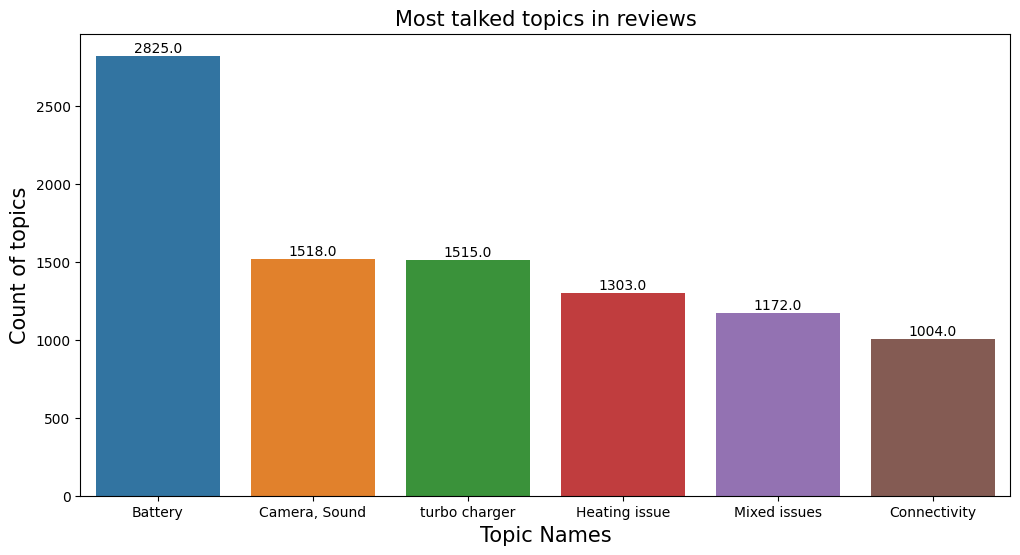

In [42]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x=review_data.Topic_Name.value_counts()[:6].index,y=review_data.Topic_Name.value_counts()[:6].values)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()+50),ha = 'center', va = 'center')
plt.xlabel('Topic Names',size=15)
plt.ylabel('Count of topics',size=15)
plt.title('Most talked topics in reviews',size=15)
plt.show()

From above graph we can say that most of customers had issues with Battery of mobile

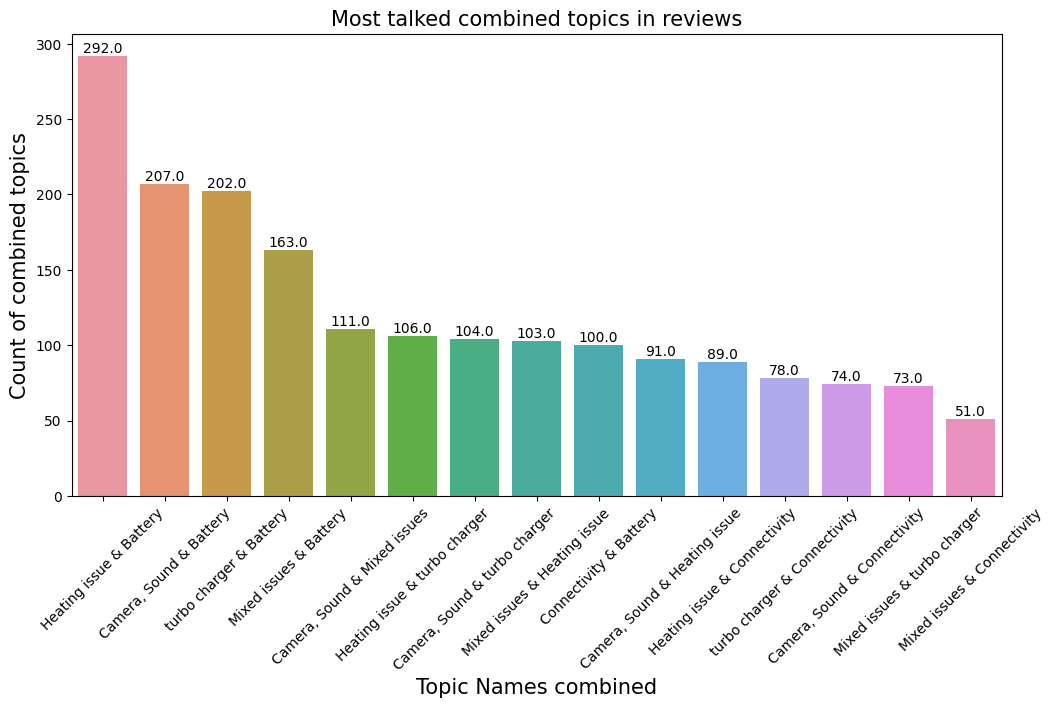

In [43]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x=review_data.Topic_Name.value_counts()[6:].index,y=review_data.Topic_Name.value_counts()[6:].values)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()+5),ha = 'center', va = 'center')
plt.xlabel('Topic Names combined',size=15)
plt.ylabel('Count of combined topics',size=15)
plt.title('Most talked combined topics in reviews',size=15)
plt.xticks(rotation=45)
plt.show()

From above graph we can say that most of customers had combined issues with,

Heating issue & Battery <br>
Camera, Sound & Battery <br>
turbo charger & Battery

### Extracting reviews of 5 topic(review of battery)

In [44]:
review_data.loc[review_data.Topic_Number.str.contains('5'),['review','Topic_Name']].head(10)\
.style.set_properties(subset=['review'], **{'width': '300px'})

,review,Topic_Name
3,The worst phone everThey have changed the last phone but the problem is still same and the amazon is not returning the phone .Highly disappointing of amazon,Heating issue & Battery
5,"Phone is awesome. But while charging, it heats up allot..Really a genuine reason to hate Lenovo k8 note",Battery
10,"Don't purchase this item, It is so much of heating &Battery life is very poor",Heating issue & Battery
12,Very good phone slim good battry backup good screen love it,Battery
15,Battery draining very rapidly I don't know why..Tell me possible solutions for battery life,Heating issue & Battery
17,"Excellent camera , excellent speed.excellent features.excelent battery.",Battery
18,It is not a very good product camera are very poor ...Os is not good...Battery draining very quickly...Like a odinary phone..It was fully unexpected product from Lenovo..,Battery
21,Awesome phone in this price and this is my second mobile from lenovo. It is fast and display has been improved.,Battery
24,"Before the new update of 8.0 Oreo, it worked superbly, the battery back-up is also superb and there is not that much heating problem...But... After that update, my phone got heating up simply, battery is also draining unnecessarily... really very much disappointed after that update of 8.0 Oreo...😒😒☹️",Connectivity & Battery
26,Good performance but the battery gets oveheated,Battery


### Conclusion

1. We can combine topic number 2 (Heating issue),3 (turbo charger), 5(Battery) <br>
2. If lenovo company improves their turbo charger which is causing heating issues in battery, the mobile will be more appreciated by users.
3. We can try to use other POS tags to improve our model.